In [2]:
import cv2
import numpy as np
import glob
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# Read dataset and spliting x and y
dataset=pd.read_csv('/content/drive/My Drive/ML_HW03/dataset.csv')
X= dataset.iloc[:, :]
X=X.drop(columns=['im_name','Male'])
Y=dataset.iloc[:,7500:7502]

In [0]:
# Splite data to train and test and normalization
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=10,stratify=Y.iloc[:,1])
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_train_lda=lda.fit_transform(X_train_std,Y_train.iloc[:,1])

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [0]:
X_test_lda=lda.transform(X_test_std)

In [21]:
print(X_train_lda)

[[ 2.54289244]
 [-3.92757998]
 [-3.64500597]
 ...
 [-3.65177482]
 [ 5.70430892]
 [ 4.74529224]]


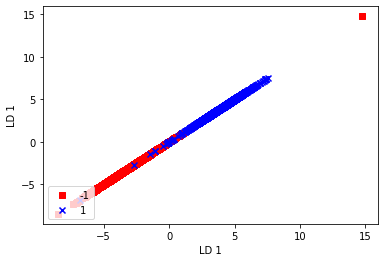

In [27]:
import matplotlib.pyplot as plt
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(Y_train.iloc[:,1]), colors, markers):
  plt.scatter(X_train_lda[Y_train.iloc[:,1]==l],X_train_lda[Y_train.iloc[:,1]==l],c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 1')
plt.legend(loc='lower left')
plt.show()

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_train_acc=[]
knn_test_acc=[]
# Accuracy for k=1 to 10
for k in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
  knn.fit(X_train_lda, Y_train.iloc[:,1])
  # Prediction
  Y_pred=knn.predict(X_test_lda)
  # Accuracy
  knn_train_acc.append(knn.score(X_train_lda,Y_train.iloc[:,1]))
  knn_test_acc.append(accuracy_score(Y_test.iloc[:,1],Y_pred))
#print(knn_score)
#print(acc_score)

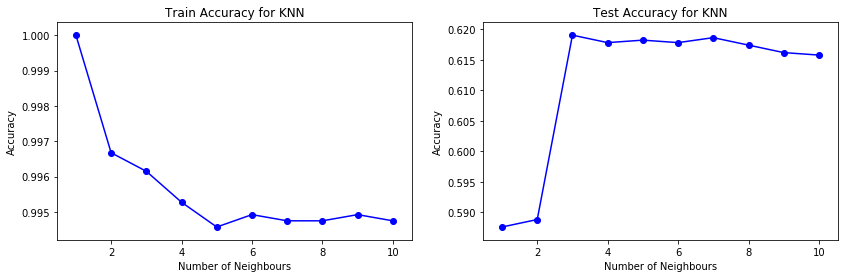

In [29]:
# Plotting accuracy For each k=0 to 10
x=np.arange(1,11)
plt.figure(figsize=(14,4))
# Train accuracy
plt.subplot(1,2,1)
plt.plot(x, knn_train_acc,color='blue')
plt.scatter(x, knn_train_acc,color='blue')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.title('Train Accuracy for KNN')
# Test accuracy
plt.subplot(1,2,2)
plt.plot(x, knn_test_acc,color='blue')
plt.scatter(x, knn_test_acc,color='blue')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.title('Test Accuracy for KNN')
plt.show()